<a href="https://colab.research.google.com/github/vn322/RUDN_Lab_Works/blob/main/stat_dz_2_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение

Кластеризация — это разделение множества входных векторов на группы (кластеры) по степени «схожести» друг на друга.

Алгоритм k-means (k-средних) относится к алгоритмам обучения без учителя (Unsupervised Learning), он наиболее простой, но в то же время достаточно неточный метод кластеризации. Он разбивает множество элементов векторного пространства на заранее известное число кластеров k. Действие алгоритма таково, что он стремится минимизировать среднеквадратичное отклонение на точках каждого кластера. Основная идея заключается в том, что на каждой итерации перевычисляется центр масс для каждого кластера, полученного на предыдущем шаге, затем векторы разбиваются на кластеры вновь в соответствии с тем, какой из новых центров оказался ближе по выбранной метрике.

Метод k-средних пытается сгруппировать похожие элементы в три этапа:

- Выберем значение k
- Инициализируем центроиды (разделительные линии)
- Выберем группу и найдем среднее значение расстояния между точками.

Алгоритм завершается, когда на какой-то итерации не происходит изменения кластеров.

Преимущества K-Means:
- простота реализации
- масштабируемость до больших наборов данных
- метод очень быстро обучается на новых примерах
- обработка сложных форм и размеров.

Недостатки алгоритма k-means:
- чувствительность к выбросам
- необходимо заранее знать количество кластеров.
- алгоритм очень чувствителен к выбору начальных центров кластеров.
- не справляется с задачей, когда объект принадлежит к разным кластерам в равной степени или не принадлежит ни одному.






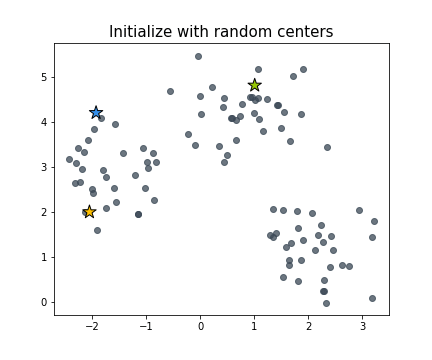

# Подготовка данных

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
df = pd.read_excel('https://github.com/vn322/RUDN_Lab_Works/raw/refs/heads/main/2.1.4.%20%D0%94%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5%20%D0%B4%D0%BB%D1%8F%20%D0%B4.%D0%B7.%20%E2%84%962.xls')
df.head(3)

,показатели,2000,2001,2002,2003,2004
0,Объем_промышленного_производства,229085.8,287038.2,346694.7,389091.5,483489.9
1,Инвестиции_в_основной_капитал,156215.2,188258.5,205363.6,263797.4,317944.9
2,Оборот_розничной_торговли,682337.3,886389.8,1034743.0,1178970.3,1370135.1


In [163]:
df.columns = df.columns.astype(str)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   показатели  9 non-null      object 
 1   2000        9 non-null      float64
 2   2001        9 non-null      float64
 3   2002        9 non-null      float64
 4   2003        9 non-null      float64
 5   2004        9 non-null      float64
dtypes: float64(5), object(1)
memory usage: 564.0+ bytes


In [165]:
df.describe()

,2000,2001,2002,2003,2004
count,9.000000,9.000000,9.000000e+00,9.000000e+00,9.000000e+00
mean,248961.977778,310610.266667,3.443928e+05,4.148431e+05,4.802565e+05
std,281492.062838,333918.423822,3.844526e+05,4.328828e+05,4.913391e+05
min,36.100000,34.700000,-2.239230e+04,-1.707590e+04,-1.376093e+04
25%,24816.100000,24816.100000,1.367510e+04,1.969340e+04,2.061770e+04
50%,184785.800000,232713.800000,2.817814e+05,3.391888e+05,3.944506e+05
75%,229085.800000,325380.900000,3.466947e+05,5.512018e+05,6.416653e+05
max,759000.000000,886389.800000,1.034743e+06,1.178970e+06,1.370135e+06


In [166]:
df1 = df.copy() # произведём копирование датасета для защиты от случайного изменения

In [167]:

df_kmeans = df1.drop('показатели', axis=1)

In [168]:
df_kmeans

,2000,2001,2002,2003,2004
0,229085.8,287038.2,346694.7,389091.500,483489.900
1,156215.2,188258.5,205363.6,263797.400,317944.900
2,682337.3,886389.8,1034743.0,1178970.300,1370135.100
3,195851.4,232713.8,281781.4,339188.758,394450.568
4,24816.1,24816.1,-22392.3,-17075.901,-13760.927
5,759000.0,834194.0,909979.0,1008687.000,1107731.000
6,184785.8,325380.9,329654.5,551201.800,641665.300
7,36.1,34.7,35.9,33.600,35.100
8,8530.1,16666.4,13675.1,19693.400,20617.700


# K-Means

In [169]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df_kmeans = scaler.fit_transform(df_kmeans)

In [170]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3)
clusters = kmeans_model.fit_predict(df_kmeans)
df_kmeans = df
#df_kmeans.insert(df_kmeans.columns.get_loc(2000), "Cluster", clusters)
df_kmeans.head(3)

,показатели,2000,2001,2002,2003,2004
0,Объем_промышленного_производства,229085.8,287038.2,346694.7,389091.5,483489.9
1,Инвестиции_в_основной_капитал,156215.2,188258.5,205363.6,263797.4,317944.9
2,Оборот_розничной_торговли,682337.3,886389.8,1034743.0,1178970.3,1370135.1


In [171]:
kmeans_model.cluster_centers_

array([[ 1.91484550e+05,  2.58347850e+05,  2.90873550e+05,
         3.85819865e+05,  4.59387667e+05],
       [ 7.20668650e+05,  8.60291900e+05,  9.72361000e+05,
         1.09382865e+06,  1.23893305e+06],
       [ 1.11274333e+04,  1.38390667e+04, -2.89376667e+03,
         8.83699667e+02,  2.29729100e+03]])

In [172]:
df_kmeans['Clusters'] = kmeans_model.labels_

в результате получили следующее распределение по кластерам

In [173]:
df_kmeans[['показатели', 'Clusters']]

,показатели,Clusters
0,Объем_промышленного_производства,0
1,Инвестиции_в_основной_капитал,0
2,Оборот_розничной_торговли,1
3,Доходы_консолидированного_бюджета,0
4,Дефицит_консолидированного_бюджета,2
5,Количество_предприятий_и_организаций,1
6,Сальдированный_финансовый_результат_деятельнос...,0
7,Численность_официально_зарегистрированных_безр...,2
8,Среднедушевой_денежный_доход_населения,2


<Axes: xlabel='2000', ylabel='2004'>

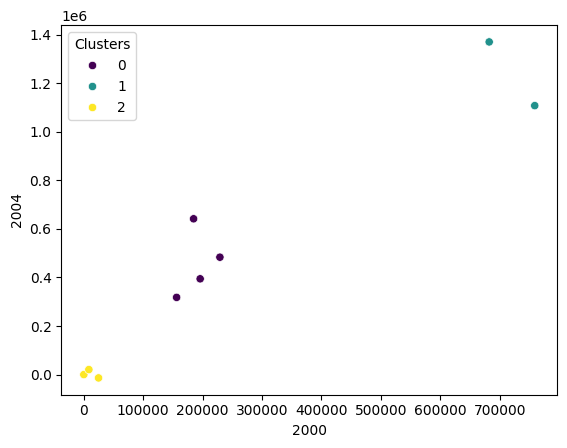

In [174]:
sns.scatterplot(x='2000', y='2004',hue = 'Clusters',  data=df_kmeans, palette='viridis')

# Выбор количества кластеров

При кластеризации методом k-средних количество кластеров чаще всего оценивают с помощью «метода локтя». Он подразумевает многократное циклическое исполнение алгоритма с увеличением количества выбираемых кластеров, а также последующим откладыванием на графике оценки кластеризации, вычисленного как функция от количества кластеров.

Метод локтя (Elbow Rule) – один из самых известных методов, с помощью которого можно выбрать правильное значение k и повысить производительность модели. Этот эмпирический метод вычисляет сумму квадратов расстояний между точками и вычисляет среднее значение.

Когда значение k равно 1, сумма квадрата внутри кластера будет большой. По мере увеличения значения k сумма квадратов расстояний внутри кластера будет уменьшаться.

Оценка является некой формой отношения внутрикластерного расстояния к межкластерному расстоянию.

In [111]:
df_km = df1.drop('показатели', axis=1)

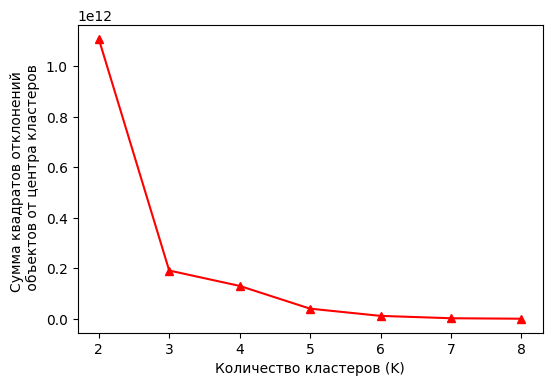

In [112]:
ssd = []
for k in range(2, 9):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(df_km)
    ssd.append(kmeans_model.inertia_)
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(range(2, 9), ssd, color="r", marker="^")
plt.xlabel("Количество кластеров (K)")
plt.ylabel("Сумма квадратов отклонений \n объектов от центра кластеров", wrap=True)
plt.show()

как можно заметить 3 кластера как раз и являются оптимальными для разделения данных

используем для анализа алгоритм основанный на других принципах

# DBSCAN

DBSCAN — это алгоритм кластеризации данных, основанный на плотности. Если дан набор точек в некотором пространстве, алгоритм группирует вместе точки, которые тесно расположены, помечая как выбросы точки, которые находятся одиноко в областях с малой плотностью (ближайшие соседи которых лежат далеко). 4

Основные гиперпараметры DBSCAN:

Радиус окрестности. Если расстояние между любыми двумя точками меньше или равно заданному радиусу, эти точки считаются соседними.
Минимальное количество соседей (точек) в радиусе. Чем больше набор данных, тем больше точек должно быть выбрано.
Работа алгоритма DBSCAN:

Алгоритм берёт точку и строит от неё буфер указанного радиуса. Если в буфер попадает количество точек больше, чем минимальное количество точек в радиусе, то эта точка становится корневой и от неё строится новый кластер. Так выбираются все корневые точки.

Далее алгоритм находит точки, у которых в буфере меньше заданного количества соседей, но есть хотя бы одна корневая точка. Эти точки становятся пограничными.

Остаются точки, в буфере от которых меньше указанного числа соседей и нет корневых элементов. Эти точки будут считаться выбросами.

Если два корневых элемента находятся рядом, то они объединяются в один кластер.

Пограничные элементы будут отнесены к группе корневого элемента из своей окрестности.

Процесс завершается, когда ни к одному кластеру не может быть добавлено ни одного нового объекта.

DBSCAN является одним из наиболее часто используемых алгоритмов кластеризации.

Подберём гиперпараметры алгоритма так, чтобы данные были разделдены на 3 кластера

In [176]:
from sklearn.cluster import DBSCAN
X = df1.drop('показатели', axis=1)

clustering = DBSCAN(eps=199999, min_samples=2).fit(X)
print(clustering.labels_)

[ 0  0 -1  0  1 -1 -1  1  1]


Преимущества DBSCAN:

Обнаружение кластеров произвольной формы. Это полезно при работе с реальными данными, которые редко бывают идеально разделены.

Определение выбросов. DBSCAN автоматически идентифицирует выбросы (шум) как точки, не принадлежащие ни одному кластеру. Это помогает очистить данные и сосредоточиться на значимых паттернах.

Не требует указания количества кластеров. DBSCAN автоматически определяет количество кластеров на основе плотности данных.


Недостатки DBSCAN:

Чувствительность к параметрам. DBSCAN требует настройки двух параметров: eps (радиус окрестности) и min_samples (минимальное количество точек в окрестности для образования кластера). Выбор оптимальных значений этих параметров может существенно влиять на результаты кластеризации.


Проблемы с кластерами разной плотности. DBSCAN может испытывать трудности с обнаружением кластеров с разной плотностью. Алгоритм может объединить два плотных кластера, разделённых областью с низкой плотностью, или разделить один кластер с переменной плотностью на несколько.


Высокая вычислительная сложность. По сравнению с некоторыми другими алгоритмами кластеризации, DBSCAN может потребовать больше вычислительных ресурсов, особенно для больших наборов данных.

In [180]:
X['Clusters']

,Clusters
0,0
1,0
2,-1
3,0
4,1
5,-1
6,-1
7,1
8,1


In [186]:
df_kmeans['DBSCAN']= X['Clusters']

можно сравнить разделение данных на три кластера двумя разными алгоритмами и убедиться, что в целом выделенные кластеры совпадают в обоих случаях

In [187]:
df_kmeans[['показатели', 'Clusters', 'DBSCAN']]

,показатели,Clusters,DBSCAN
0,Объем_промышленного_производства,0,0
1,Инвестиции_в_основной_капитал,0,0
2,Оборот_розничной_торговли,1,-1
3,Доходы_консолидированного_бюджета,0,0
4,Дефицит_консолидированного_бюджета,2,1
5,Количество_предприятий_и_организаций,1,-1
6,Сальдированный_финансовый_результат_деятельнос...,0,-1
7,Численность_официально_зарегистрированных_безр...,2,1
8,Среднедушевой_денежный_доход_населения,2,1


<Axes: xlabel='2000', ylabel='2004'>

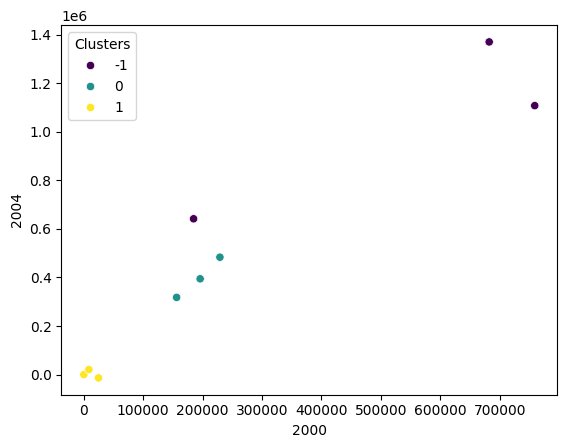

In [179]:
X['Clusters'] = clustering.labels_
sns.scatterplot(x="2000", y="2004",hue = 'Clusters',  data=X, palette='viridis')